In [1]:
%matplotlib inline

#Importing regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Loading Model evaluators
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [2]:
df = pd.read_csv('Heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
df.target.value_counts(normalize = True)

1    0.544554
0    0.455446
Name: target, dtype: float64

SUMMARY OF INITIAL FINDINGS: 
There are 303 rows, meaning there are 303 enteries, and 14 columns.
Out of the 303 enteries, 165 has heart disease, and 138 don't.
Looking at the normalized value count, we can see that the traget column is balanced, which is good because a balanced data provides the same amount of information to predict each class and, as a result, provides a clearer picture of how to respond to test data Reference.
From the info details, we can see that there are no missing values in the dataset.But outliers found.
Next we'll start by comparing different columns with each other to find patterns in our data. With this, we can see the relationship between the features and the target variable.

In [8]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


Here we can see that out of the 96 women present in the study, 72 (75%) of them have heart disease, while 24 (25%) of them don't. And out of the 207 men in the study, 114 (55%) of them have heart disease and 93 (45%) of them don't. This shows that women are more likely than men to die from heart failure and heart attacks.

If we take the average of both positives and negatives, we can roughly assume that an individual (male or female) has a 65% chance of having a heart disease, and 35% chance of not. We can use this as our baseline

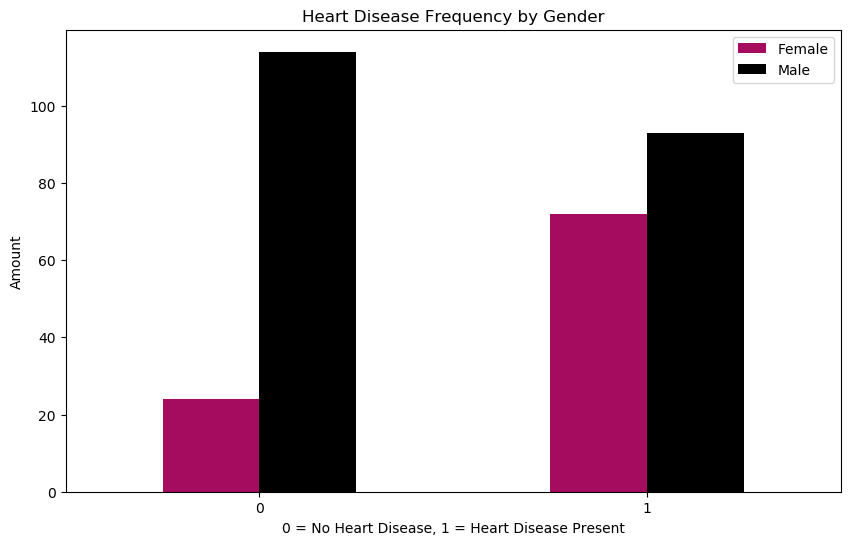

In [9]:
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["#a50b5e", "black"])

plt.title("Heart Disease Frequency by Gender")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease Present")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

# COMPARING CHOL, AGE, AND THALAC TO THE TARGET

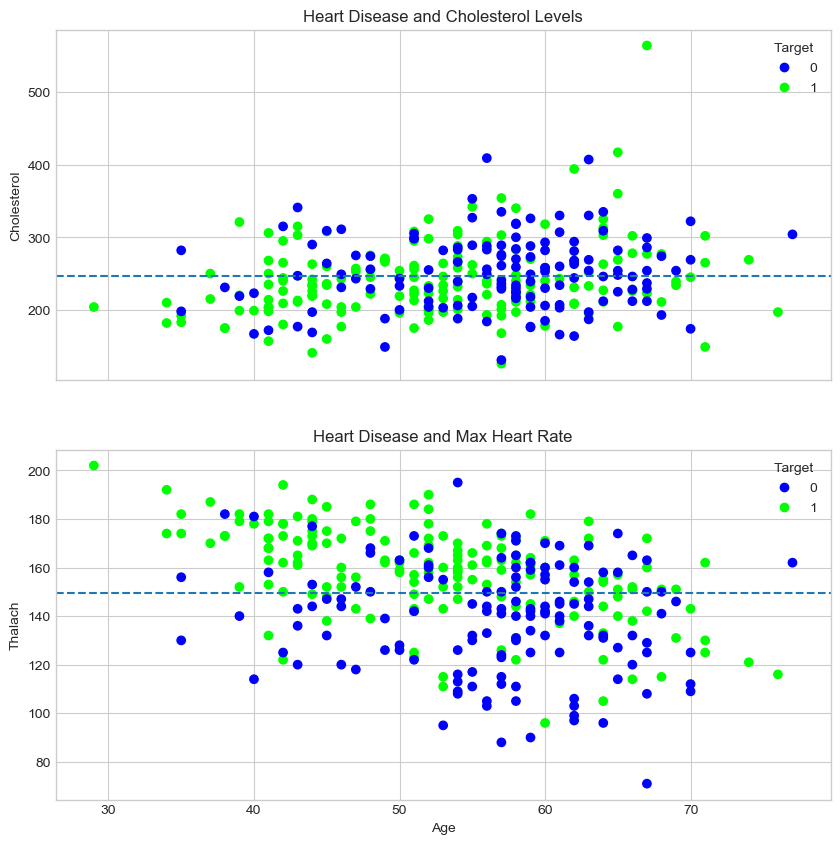

In [10]:
plt.style.use('seaborn-whitegrid')

# Subplots of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(10, 10),
                               sharex=True)

scatter = ax0.scatter(x=df["age"],
                     y=df["chol"],
                     c=df["target"],
                     cmap="brg")
ax0.set(title="Heart Disease and Cholesterol Levels",
       ylabel="Cholesterol")

ax0.legend(*scatter.legend_elements(), title="Target")
ax0.axhline(y=df["chol"].mean(),
           linestyle="--");


scatter = ax1.scatter(x=df["age"],
                     y=df["thalach"],
                     c=df["target"],
                     cmap="brg")
ax1.set(title="Heart Disease and Max Heart Rate",
       xlabel="Age",
       ylabel="Thalach")

ax1.legend(*scatter.legend_elements(), title="Target")
ax1.axhline(y=df["thalach"].mean(),
           linestyle="--");

From this scatterplot, there appears to be a positive correlation between serum cholesterol and age. Whereas, we see a negative correlation between maximum heart rate and age. Meaning, as age increased, the heart rate decreased.

Also, the blue dots (No heart disease) seemed to increase with age which seemed a bit off. To have a clear idea of what's actually going on, let's have a distribution of the age using a density plot.

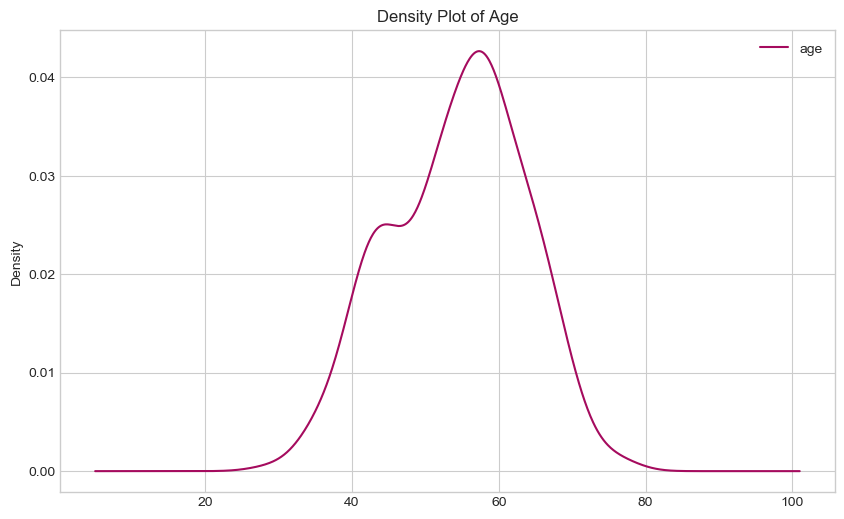

In [11]:
pd.DataFrame(df['age']).plot(kind='density', figsize=(10, 6), 
                             color=['#a50b5e'])

plt.title("Density Plot of Age")
plt.show()

This density plot explains the reason for our result in the scatterplot. Even though this is a normal distribution, we can see that the vast majority of the patients fall between the ages of 45 and 65

# COMPARING CP (CHEST PAIN) TO THE TARGET
Here we will see if chest pain relates to whether someone has heart disease or not. Let's start by comparing the target column with the cp column, using the crosstab function.

In [12]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


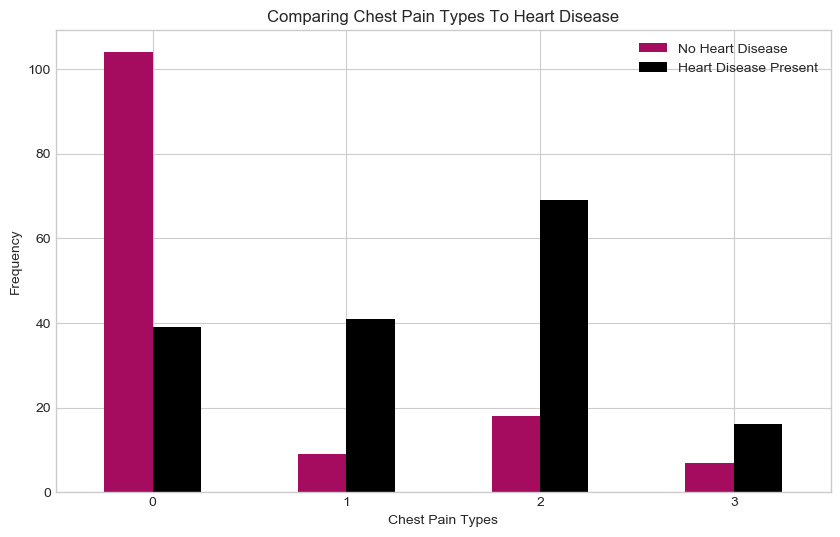

In [13]:
pd.crosstab(df.cp, df.target).plot(kind='bar', 
                                   figsize=(10, 6), 
                                   color=["#a50b5e", "black"])

plt.title("Comparing Chest Pain Types To Heart Disease")
plt.xlabel("Chest Pain Types")
plt.ylabel("Frequency")
plt.legend(["No Heart Disease", "Heart Disease Present"])
plt.xticks(rotation=0);

Looking at this chart, we can see that for the participants whose chest pain is caused by physical exertion or emotional stress (i.e Typical Angina(0)), 104 of them do not have heart diease while 39 of them do, which is understandable.

For those whose chest pain was caused as a result of respiratory, gastrointestinal or musculosketal disease (i.e Atypical Angina(1)), 41 of them have heart disease and 9 of them don't.

Interestingly, those whose chest pain is not heart-related (i.e Non-anginal (2)), are seen to have the highest number of participants with heart disease (69) compared to the rest. This could be as a result of misdiagnosis. Asking patients questions to primarily diagnose a chest pain as nonanginal can sometimes be very misleading.

# CORRELATION MATRIX
Let's see how the independent variables interact with each other. To do this, we'll use the corr function.

In [14]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


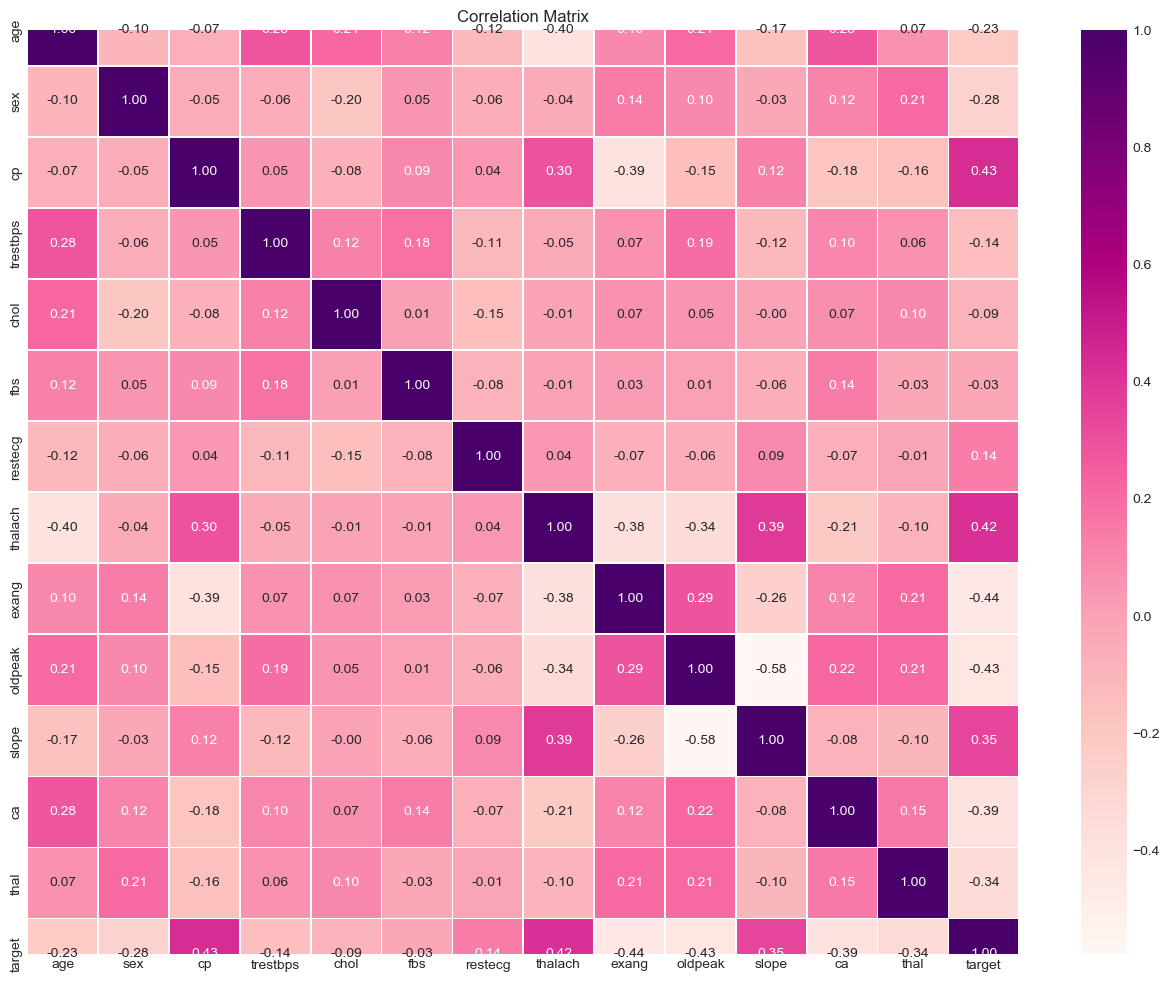

In [15]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="RdPu")

ax.set_title('Correlation Matrix');

SUMMARY

The features with the highest positive correlation to the target variable are: cp: 0.43, thalach: 0.42, and slope: 0.35.
The features with the highest negative correlation to the target variable are: exang: -0.44, oldpeak: -0.43, ca: -0.39, and thal: -0.34.
We can also see a positive correlation between restecg and target. However, since there are 3 values in the restecg data, let's do a more detailed comparism of both features.

COMPARING RESTECG TO TARGET

Lastly, let's see the relationship between restecg (resting electrocardiography) and heart disease. This treatment is used to evaluate known cardiovascular disorders, to discover previously unidentified cardiovascular conditions, and to provide a baseline against which to analyze postoperative changes Reference.

Restecg Values
0: Normal
1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression greater than 0.05 mV)
2: showing probable or definite left ventricular hypertrophy by Estes' criteria

In [16]:
pd.crosstab(df.restecg, df.target)

target,0,1
restecg,,
0,79,68
1,56,96
2,3,1


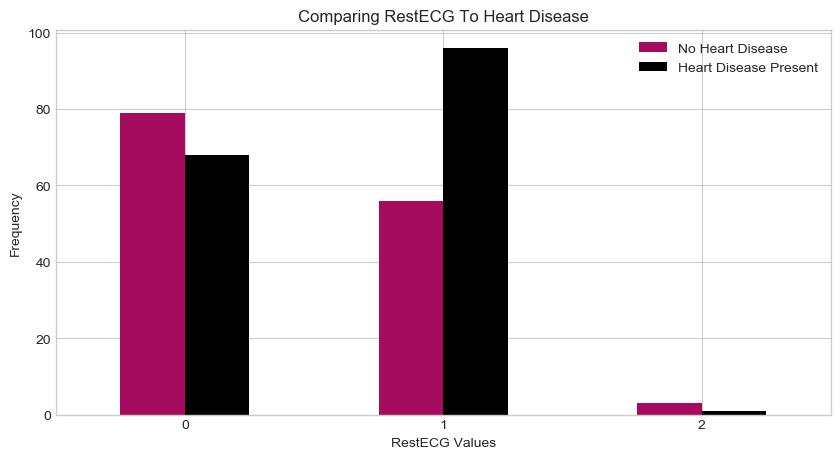

In [17]:
pd.crosstab(df.restecg, df.target).plot(kind='bar', 
                                   figsize=(10, 5), 
                                   color=["#a50b5e", "black"])

plt.title("Comparing RestECG To Heart Disease")
plt.xlabel("RestECG Values")
plt.ylabel("Frequency")
plt.legend(["No Heart Disease", "Heart Disease Present"])
plt.xticks(rotation=0);

# MODELING
For this problem we're going to use the independent variables: age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, and thal, to predict the dependent variable: target.

In [18]:
independent = df.drop('target', axis =1)
dependent = df['target']

In [19]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size = 0.2)

# CHOOSING OUR MACHINE LEARNING MODEL
Let's choose our model, which we will train to find the patterns on the training set and then use the patterns on the test set. Since this is a classification problem, we are going to try 2 different ML models:

LogisticRegression, and
RandomForestClassifier.

Since all the algorithms in the Sklearn library uses the same functions for fitting and scoring a model, let's instantiate each model in a dictionary and create a function to fit and score them.

In [20]:
# Put them in a dict
models = {"Logistic Regression": LogisticRegression(max_iter=3000),
         "Random Forest CLF": RandomForestClassifier()}

log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Create function to fit and score them
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    # Save the state of random function
    np.random.seed(42)
    
    # Create an empty dict called model_scores
    model_scores = {}
    
    # Loop through the models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [21]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


{'Logistic Regression': 0.8688524590163934,
 'Random Forest CLF': 0.8524590163934426}

We can see that the Logistic Regression Model did a better job at predicting heart disease. However, let's have a better comparison using a bar chart.

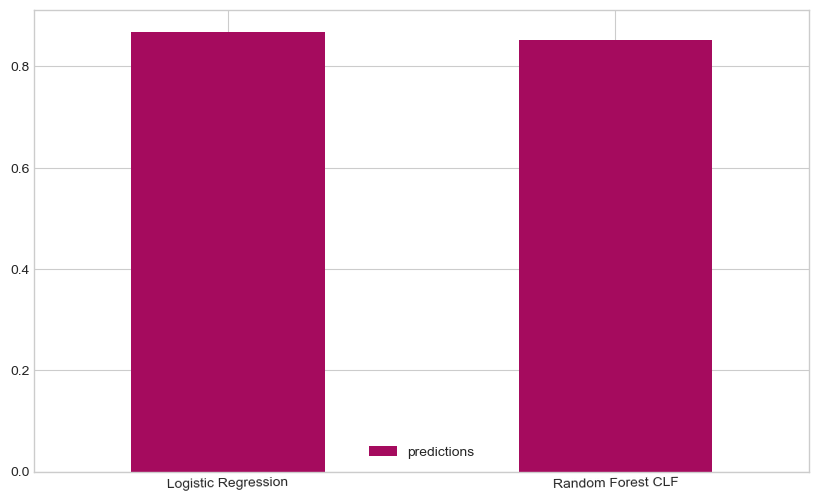

In [22]:
model_viz = pd.DataFrame(model_scores, index=['predictions'])
model_viz.T.plot.bar(rot=1, figsize=(10, 6), color=["#a50b5e"]);

# HYPERPARAMETER TUNING AND CROSS-VALIDATION
Let's change the hyperparameters of our models to see if we can get a better result. After that, we'll perform a cross-validation, since we we have a limited data sample.

TUNING WITH RandomizedSearchCV
We'll start by using RandomizedSearchCV to tune our LogisticRegression model but first, let's create a hyperparameter grid (i.e. a dict of different hyperparameters) for each and then test them out.

In [23]:
# For LogisticRegression hyperparameters
lr_grid = {"C": np.logspace(-5, 5, 20),
               "solver": ["liblinear"]}

# For RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [24]:
np.random.seed(42)

rs_lr = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=lr_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_lr.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [25]:
# Find the best params
rs_lr.best_params_

{'solver': 'liblinear', 'C': 233.57214690901213}

In [26]:
print(f'Test Score Using RSCV on LR: {rs_lr.score(X_test, y_test)}')

Test Score Using RSCV on LR: 0.8524590163934426


In [27]:
#tune our RandomForestClassifier model using RandomizedSearchCV
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs

C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs

C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs

C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs

C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs

C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs

In [28]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [29]:
print(f'Test Score Using RSCV on RF: {rs_rf.score(X_test, y_test)}')

Test Score Using RSCV on RF: 0.8688524590163934


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


Here we can see a much better result in the RandomForestClassifier when we tuned it using the RandomizedSearchCV. However, since the Logistic Regression Model is not doing better, we will push on with it. So, let's try tuning our Logistic Regression Model using GridSearchCV.

TUNING WITH GridSearchCV
In contrast to RandomSearchCV, which tries random combinations of a range of values, GridSearchCV tries every possible combination of the current list of hyper-parameter values and selects the best combination based on the cross validation score. The best hyper-parameters are often obtained using GridSearchCV, despite the longer fitting time

In [30]:
# Different LogisticRegression hyperparameters
lr_grid = {"C": np.logspace(-5, 10, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_lr = GridSearchCV(LogisticRegression(),
                          param_grid=lr_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_lr.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
gs_lr.best_params_

{'C': 174.33288221999908, 'solver': 'liblinear'}

In [32]:
 print(f'Test Score Using GS on LR: {gs_lr.score(X_test, y_test)}')

Test Score Using GS on LR: 0.8524590163934426


# CLASSIFIER MODEL EVALUATION
Since we've tried to find the best hyperparameters using RandomizedSearchCV and GridSearchCv, let's use a few more evaluation metrics such as: confusion matrix, ROC curve and AUC score, Recall, Classification Report, Precision, and F1-score.

First, let's make predictions on the test data.

In [33]:
y_preds = gs_lr.predict(X_test)

AUC - ROC CURVE
This curve measures the performance for classification problems at various threshold settings. It reveals how well the model is capable of differentiating across classes. The closer the AUC score is to 1, the better. Here we'll use the RandomizedSearchCV version of our Logistic Regression estimator, rs_lr and the test data (X_test and y_test)

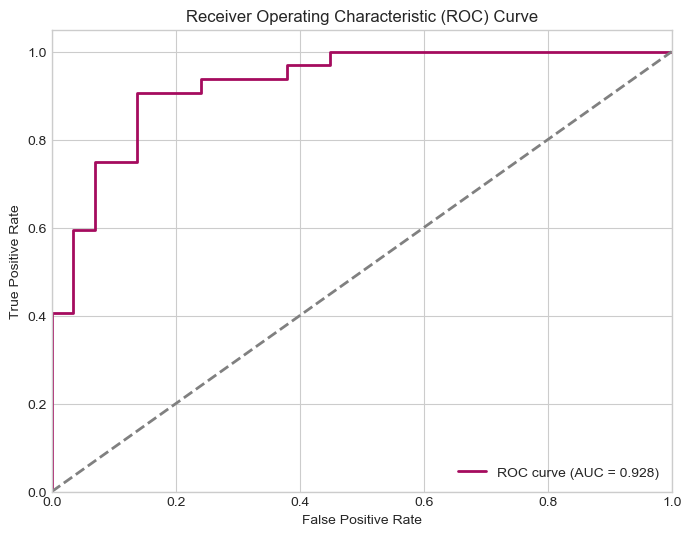

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
#import matplotlib.pyplot as plt

# 1. Get the predicted probabilities for the positive class (class 1)
# Use the best estimator from the grid search
y_pred_proba = rs_lr.best_estimator_.predict_proba(X_test)[:, 1]

# 2. Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 3. Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# 4. Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#a50b5e', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Here we can see that the Logistic Regression did a good job at classifying the positive class in the dataset.

CONFUSION MATRIX
This will give us insight into the errors being made by our classifier as well as an insight into the types of errors that are being made.

In [35]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 5 27]]


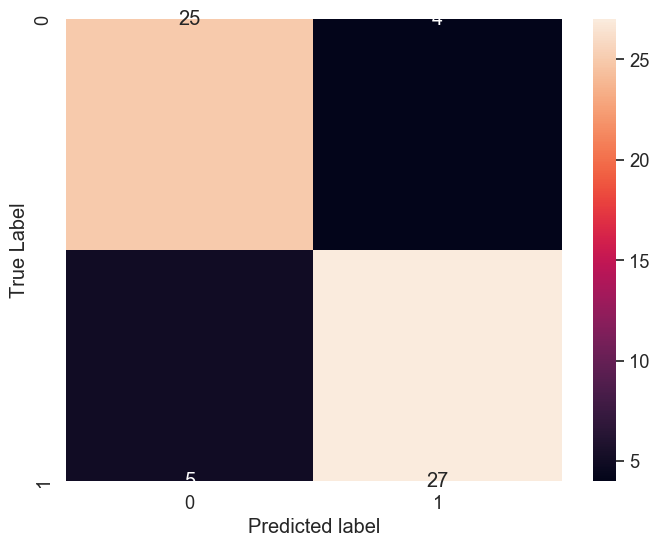

In [36]:
sns.set(font_scale=1.2) # Increase font size

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=True,)
    plt.xlabel("Predicted label")
    plt.ylabel("True Label")
       
plot_conf_mat(y_test, y_preds)

True Positive = 27 values were predicted correctly by the model
False Positive = 4 values were wrongly predicted
True Negative = 25 values of no heart disease were predicted correctly by the model
False Negative = 5 values were predicted as no heart disease

CLASSIFICATION REPORT: PRECISION, RECALL, F1-SCORE, SUPPORT
This is one of the performance evaluation metrics of a classification model that displays the model's accuracy, precision, recall, F1 score and support. Since we already imported the classification report, let's visualize them by passing it the true labels and our predicted labels.

In [37]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



However, these values were only calculated using on one test split. Let's recalculate this using Cross Validation.

CROSS VALIDATION
Now we'll use cross_val_score() to calculate the accuracy, precision, recall, and f1-score of our model. To do that, let's start by checking our best hyperparameters.

In [38]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 233.57214690901213}

In [39]:
# C value is modified based on the training document used.
clf = LogisticRegression(C=0.1623776739188721,
                        solver="liblinear")

In [40]:
cv_acc = cross_val_score(clf, independent, dependent, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc) # Mean accuracy
print("Cross-Validated Accuracy: ", cv_acc)

Cross-Validated Accuracy:  0.8446994535519124


In [41]:
# Cross-validated precision

cv_prec = cross_val_score(clf, independent, dependent, cv=5, scoring="precision")
cv_prec = np.mean(cv_prec) # Mean precision
print("Cross-Validated Precision: ", cv_prec)

Cross-Validated Precision:  0.8207936507936507


In [42]:
# Cross-validated recall

cv_recall = cross_val_score(clf, independent, dependent, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall) # Mean recall
print("Cross-Validated Recall: ", cv_recall) 

Cross-Validated Recall:  0.9212121212121213


In [43]:
# Cross-validated f1-score

cv_f1 = cross_val_score(clf,independent, dependent, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1) # Mean f1-score
print("Cross-Validated f1-score: ", cv_f1)

Cross-Validated f1-score:  0.8673007976269721


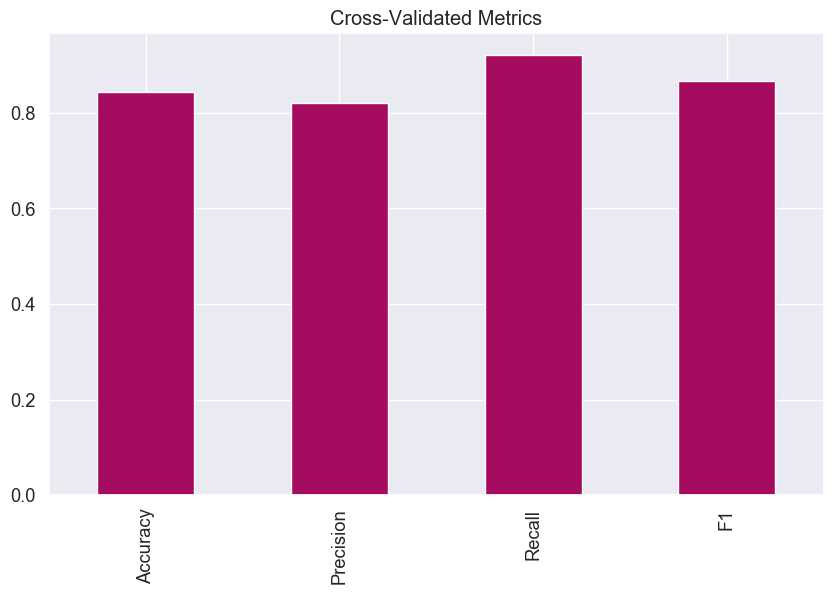

In [44]:
# Let's visualize our cross-validated metrics

# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_prec,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(figsize=(10, 6), title="Cross-Validated Metrics", 
                      color=["#a50b5e"], legend=False);

# FEATURE IMPORTANCE
Lastly, it is important to know which independent variable contributed the most to the prediction we got from the logisitic regression model. In other words, what feature is of utmost importance. This is important because it will give us better interpretability of the data.

To do this, we'll obtain the importance from coefficients, since they are already assigned to each input value.

In [45]:
#Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.1623776739188721,
                        solver="liblinear")

clf.fit(X_train, y_train);
clf.coef_

# match them to their features 

features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0021672760502060885,
 'sex': -0.7820482888818447,
 'cp': 0.634999874187791,
 'trestbps': -0.011539925047445838,
 'chol': -0.0015939793270933482,
 'fbs': 0.03656171819267012,
 'restecg': 0.27880222391511994,
 'thalach': 0.024355504037228245,
 'exang': -0.5555167504064342,
 'oldpeak': -0.555279362229381,
 'slope': 0.41512537672445543,
 'ca': -0.609621792816427,
 'thal': -0.6403036090032393}

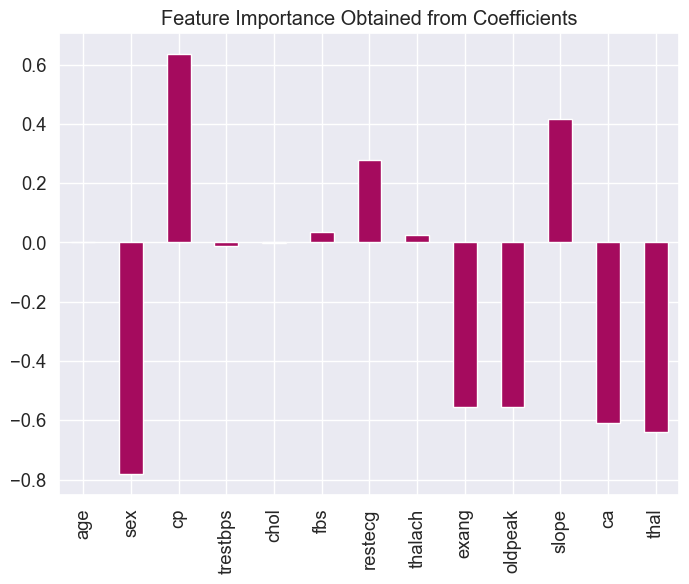

In [46]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance Obtained from Coefficients", 
                       figsize=(8, 6), color=["#a50b5e"], legend=False);

Here we can clearly see that the independent variables that contributed the most to the prediction we got from the logisitic regression model are: sex, cp, restecg, exang, oldpeak, slope, ca, and thal.

Features like: age, trestbps, chol, fbs, and thalach did not contribute much to the patterns the model found.

# CONCLUSION
In this notebook, we explored a binary classification problem, using a dataset made available by UCI Machine Learning Repository from the Cleveland database. Our goal was to reach an accuracy of 96% at predicting whether or not someone has heart disease but we only got about 89% accuracy using the Logistic Regression Model.
The Logistic Regression model did a fairly good job at predicting which patient has heart diseases or not. However, a lot can still be done to improve on our accuracy score.
Some biases where observed during EDA. For example, patients whose chest pain are not heart-related were seen to have the highest number of participants with heart disease compared to the rest. This could have been as a result of misdiagnosis. In this regard, more data would suffice.
Perhaps we could try a better model in the future.